# Week 2 Analysis Notebook

This notebook is for tasks completed in week 2. The initial goal is to expand on the work done on the full spectrum galaxy SED as described in the journal mainly looking at evolution over time (by looking at redshift). 

Need to begin by symlinking data from Simba directory in cuillin to here because now need to access data across redshifts. Sticking to 25 Mpc/h volume with 2x256^3 particles but for all redshifts initially. File 151 is z=0 and they go inversely.

In [1]:
from pathlib import Path
import re
import numpy as np
import h5py
import fsps
import caesar
import astropy.units as u
from astropy.constants import c
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')
from week_2_funcs import get_redshift, list_snapshots, compute_summed_sed_from_appmags, compute_summed_sed_from_absmags, get_stellar_mass_bins, classify_galaxies

CAT_DIR = Path("/home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256")

yt : [INFO     ] 2026-01-23 13:59:10,886 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_150.hdf5
yt : [INFO     ] 2026-01-23 13:59:10,900 Found 15890 halos
yt : [INFO     ] 2026-01-23 13:59:10,902 Found 1152 galaxies
yt : [INFO     ] 2026-01-23 13:59:10,914 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_145.hdf5
yt : [INFO     ] 2026-01-23 13:59:10,931 Found 7702 halos
yt : [INFO     ] 2026-01-23 13:59:10,933 Found 886 galaxies
yt : [INFO     ] 2026-01-23 13:59:10,962 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_135.hdf5
yt : [INFO     ] 2026-01-23 13:59:10,971 Found 7869 halos
yt : [INFO     ] 2026-01-23 13:59:10,974 Found 822 galaxies
yt : [INFO     ] 2026-01-23 13:59:11,003 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_120.hdf5
yt : [INFO  

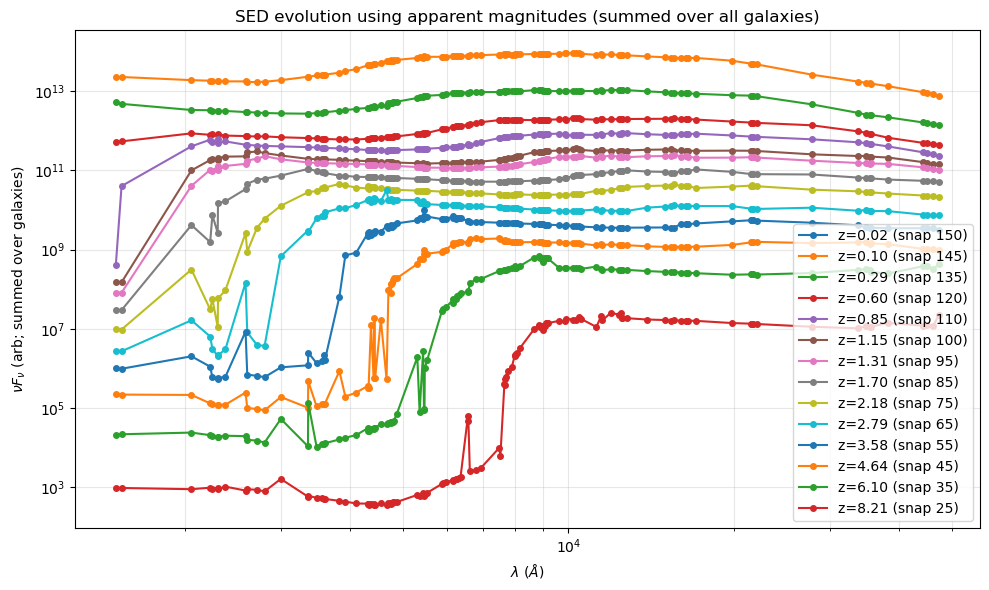

In [2]:
### Apparent magnitudes-based SED
snaps = list_snapshots()
snap_nums = [150, 145, 135, 120, 110, 100, 95, 85, 75, 65, 55, 45, 35, 25]  # adjust as desired

plt.figure(figsize=(10, 6))

for snap, path in snaps:
    if snap not in snap_nums:
        continue

    obj = caesar.load(path)
    z = get_redshift(obj)

    lam_AA, nuFnu, _ = compute_summed_sed_from_appmags(path)
    plt.loglog(lam_AA, nuFnu, marker="o", linewidth=1.5, markersize=4, label=f"z={z:.2f} (snap {snap})")

# plt.gca().invert_xaxis()  # optional: common in astronomy (short λ on right/left preference)
plt.xlabel(r"$\lambda$ ($\AA$)")
plt.ylabel(r"$\nu F_\nu$ (arb; summed over galaxies)")
plt.title("SED evolution using apparent magnitudes (summed over all galaxies)")
plt.grid(True, alpha=0.3, which="both")
plt.legend()
plt.tight_layout()
plt.show()

yt : [INFO     ] 2026-01-23 14:50:15,276 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_150.hdf5
yt : [INFO     ] 2026-01-23 14:50:15,287 Found 15890 halos
yt : [INFO     ] 2026-01-23 14:50:15,289 Found 1152 galaxies


yt : [INFO     ] 2026-01-23 14:50:15,297 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_145.hdf5
yt : [INFO     ] 2026-01-23 14:50:15,311 Found 7702 halos
yt : [INFO     ] 2026-01-23 14:50:15,313 Found 886 galaxies
yt : [INFO     ] 2026-01-23 14:50:15,331 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_135.hdf5
yt : [INFO     ] 2026-01-23 14:50:15,337 Found 7869 halos
yt : [INFO     ] 2026-01-23 14:50:15,339 Found 822 galaxies
yt : [INFO     ] 2026-01-23 14:50:15,355 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_120.hdf5
yt : [INFO     ] 2026-01-23 14:50:15,361 Found 8215 halos
yt : [INFO     ] 2026-01-23 14:50:15,363 Found 725 galaxies
yt : [INFO     ] 2026-01-23 14:50:15,379 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_110.hdf5
yt : [INFO    

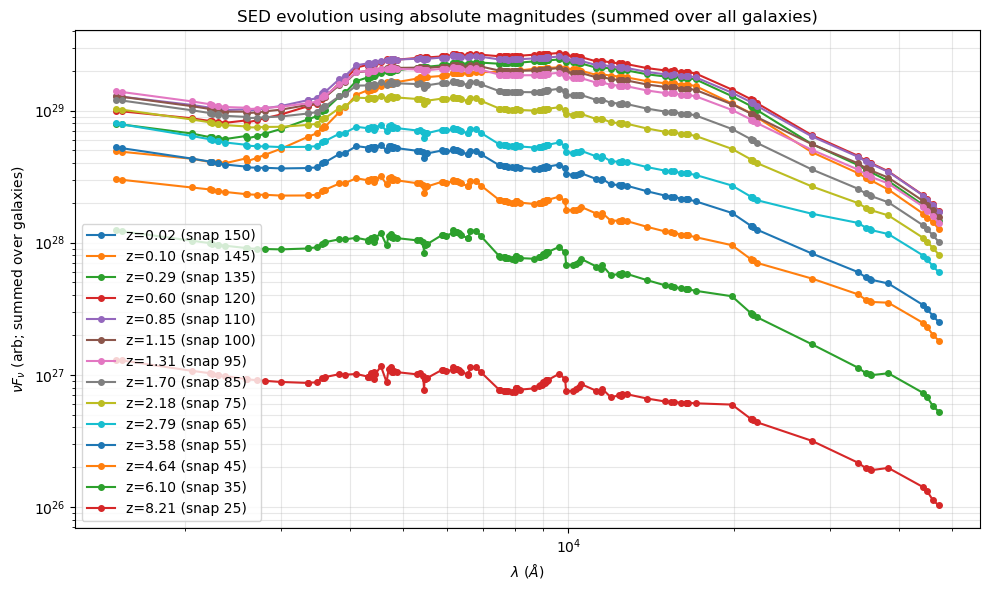

In [2]:
### Absolute magnitudes-based SED
snaps = list_snapshots()
snap_nums = [150, 145, 135, 120, 110, 100, 95, 85, 75, 65, 55, 45, 35, 25]  # adjust as desired

plt.figure(figsize=(10, 6))

for snap, path in snaps:
    if snap not in snap_nums:
        continue

    obj = caesar.load(str(path))
    z = get_redshift(obj)

    lam_AA, nuFnu, _ = compute_summed_sed_from_absmags(path)
    plt.loglog(lam_AA, nuFnu, marker="o", linewidth=1.5, markersize=4, label=f"z={z:.2f} (snap {snap})")

# plt.gca().invert_xaxis()  # optional: common in astronomy (short λ on right/left preference)
plt.xlabel(r"$\lambda$ ($\AA$)")
plt.ylabel(r"$\nu F_\nu$ (arb; summed over galaxies)")
plt.title("SED evolution using absolute magnitudes (summed over all galaxies)")
plt.grid(True, alpha=0.3, which="both")
plt.legend()
plt.tight_layout()
plt.show()

yt : [INFO     ] 2026-01-23 14:52:44,699 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_148.hdf5
yt : [INFO     ] 2026-01-23 14:52:44,709 Found 7647 halos
yt : [INFO     ] 2026-01-23 14:52:44,711 Found 901 galaxies
yt : [INFO     ] 2026-01-23 14:52:44,809 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_120.hdf5
yt : [INFO     ] 2026-01-23 14:52:44,818 Found 8215 halos
yt : [INFO     ] 2026-01-23 14:52:44,820 Found 725 galaxies
yt : [INFO     ] 2026-01-23 14:52:44,910 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_080.hdf5
yt : [INFO     ] 2026-01-23 14:52:44,919 Found 8878 halos
yt : [INFO     ] 2026-01-23 14:52:44,921 Found 536 galaxies
yt : [INFO     ] 2026-01-23 14:52:44,996 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_050.hdf5
yt : [INFO    

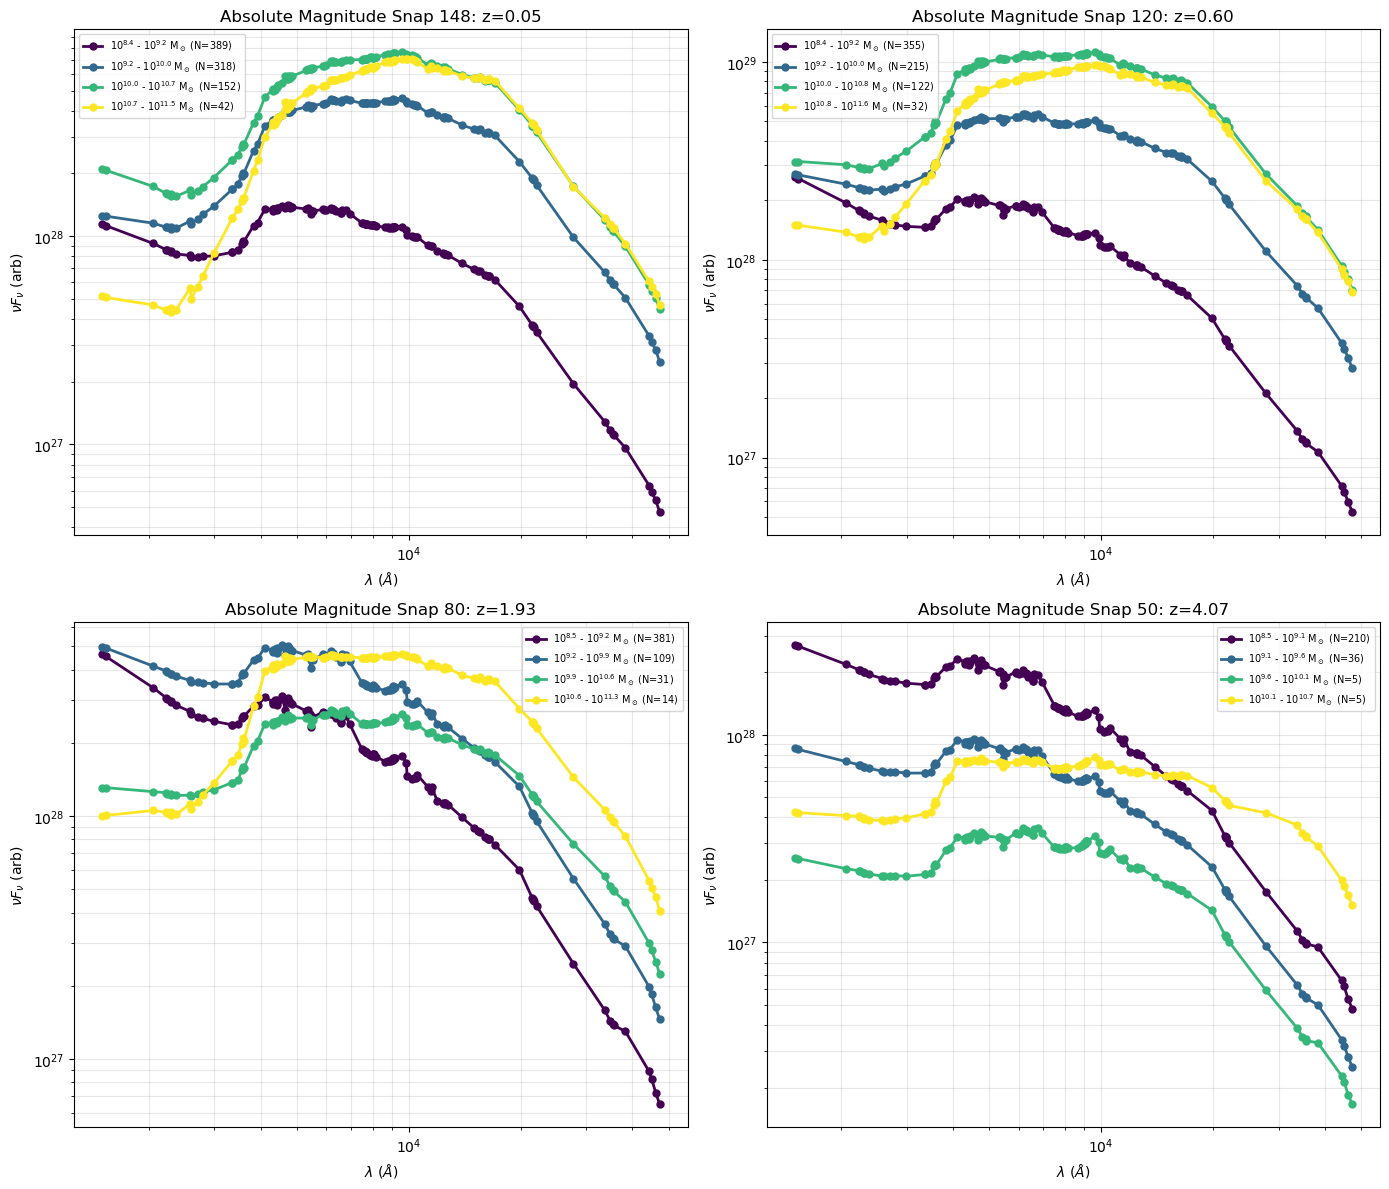

In [8]:
### SED by stellar mass bin - 4 snapshots comparison
snap_targets = [148, 120, 80, 50]
snaps = list_snapshots()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, snap_target in enumerate(snap_targets):
    for snap, path in snaps:
        if snap == snap_target:
            z = get_redshift(caesar.load(str(path)))
            break
    
    # Get stellar masses
    with h5py.File(path, "r") as f:
        stellar_mass = f["galaxy_data/dicts/masses.stellar"][:]
    
    # Create mass bins
    bin_indices, bins = get_stellar_mass_bins(stellar_mass, n_bins=4)
    
    # Plot SEDs for each mass bin
    ax = axes[idx]
    colors = plt.cm.viridis(np.linspace(0, 1, len(bins) - 1))
    
    for i in range(len(bins) - 1):
        mask = bin_indices == i
        n_gal = mask.sum()
        
        if n_gal == 0:
            continue
        
        lam_AA, nuFnu, _ = compute_summed_sed_from_absmags(path, mask=mask)
        
        label = f"$10^{{{np.log10(bins[i]):.1f}}}$ - $10^{{{np.log10(bins[i+1]):.1f}}}$ M$_\\odot$ (N={n_gal})"
        ax.loglog(lam_AA, nuFnu, marker="o", linewidth=2, markersize=5, color=colors[i], label=label)
    
    ax.set_xlabel(r"$\lambda$ ($\AA$)")
    ax.set_ylabel(r"$\nu F_\nu$ (arb)")
    ax.set_title(f"Absolute Magnitude Snap {snap_target}: z={z:.2f}")
    ax.legend(fontsize=7)
    ax.grid(True, alpha=0.3, which="both")

plt.tight_layout()
plt.show()


yt : [INFO     ] 2026-01-23 14:50:49,799 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_148.hdf5
yt : [INFO     ] 2026-01-23 14:50:49,808 Found 7647 halos
yt : [INFO     ] 2026-01-23 14:50:49,811 Found 901 galaxies
yt : [INFO     ] 2026-01-23 14:50:49,902 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_120.hdf5
yt : [INFO     ] 2026-01-23 14:50:49,911 Found 8215 halos
yt : [INFO     ] 2026-01-23 14:50:49,913 Found 725 galaxies
yt : [INFO     ] 2026-01-23 14:50:49,998 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_080.hdf5
yt : [INFO     ] 2026-01-23 14:50:50,006 Found 8878 halos
yt : [INFO     ] 2026-01-23 14:50:50,009 Found 536 galaxies
yt : [INFO     ] 2026-01-23 14:50:50,072 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_050.hdf5
yt : [INFO    

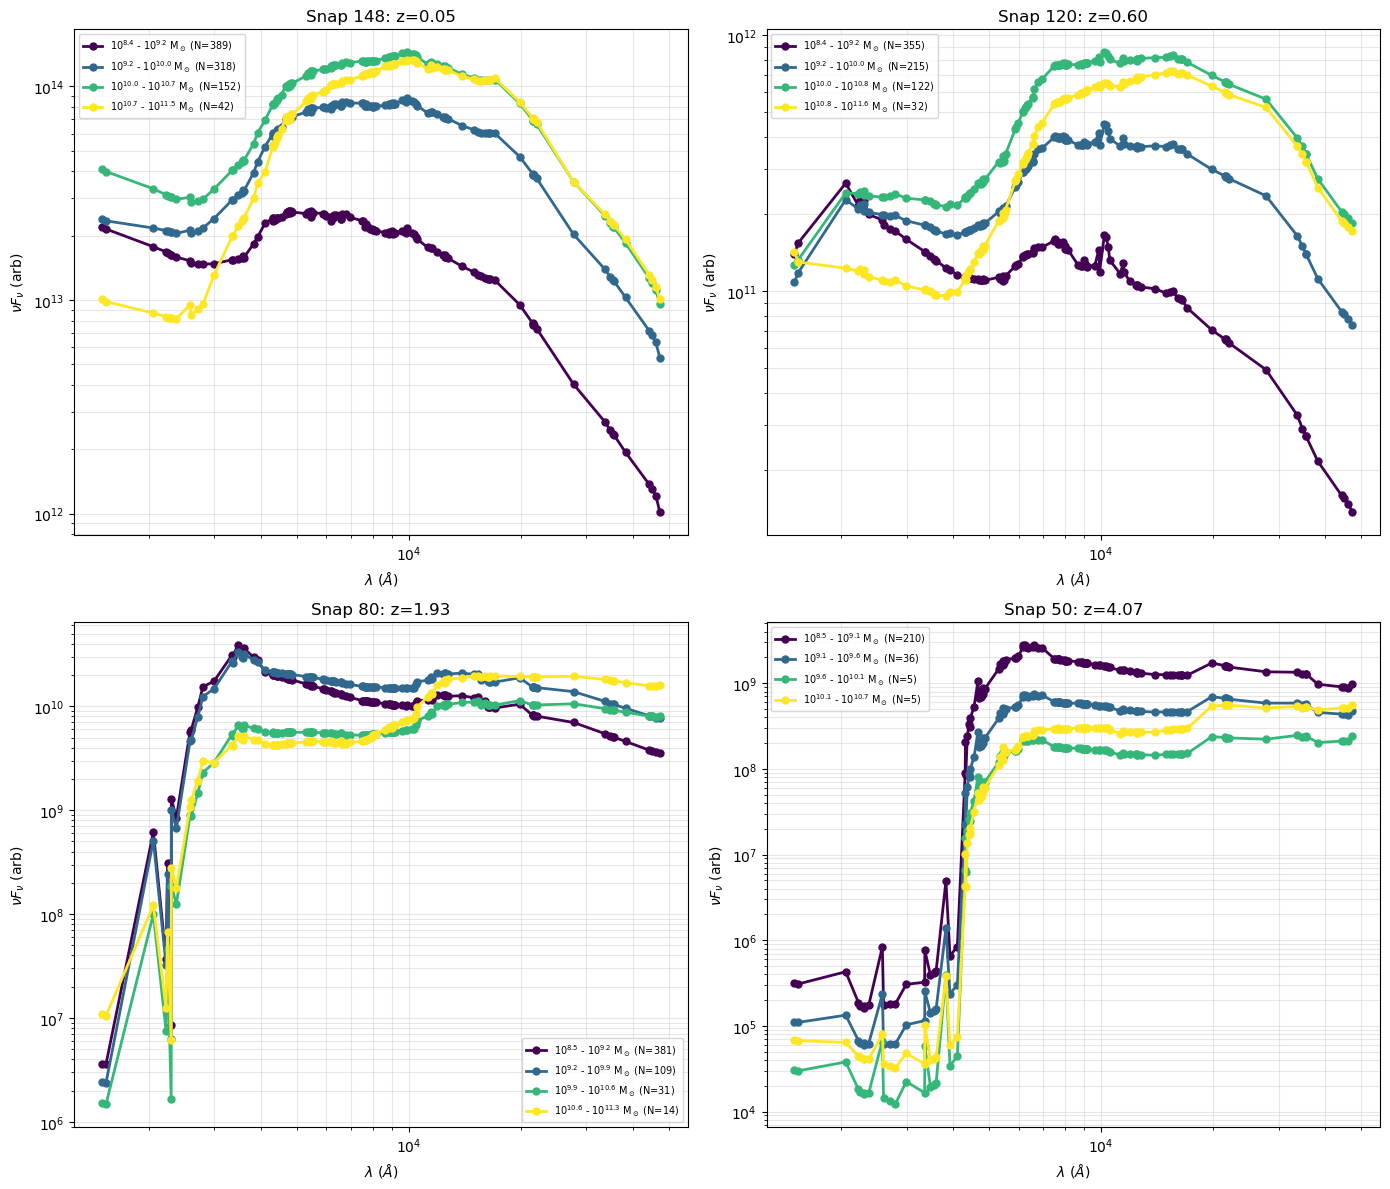

In [ ]:
### SED by stellar mass bin - 4 snapshots comparison
snap_targets = [148, 120, 80, 50]
snaps = list_snapshots()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, snap_target in enumerate(snap_targets):
    for snap, path in snaps:
        if snap == snap_target:
            z = get_redshift(caesar.load(str(path)))
            break
    
    # Get stellar masses
    with h5py.File(path, "r") as f:
        stellar_mass = f["galaxy_data/dicts/masses.stellar"][:]
    
    # Create mass bins
    bin_indices, bins = get_stellar_mass_bins(stellar_mass, n_bins=4)
    
    # Plot SEDs for each mass bin
    ax = axes[idx]
    colors = plt.cm.viridis(np.linspace(0, 1, len(bins) - 1))
    
    for i in range(len(bins) - 1):
        mask = bin_indices == i
        n_gal = mask.sum()
        
        if n_gal == 0:
            continue
        
        lam_AA, nuFnu, _ = compute_summed_sed_from_appmags(path, mask=mask)
        
        label = f"$10^{{{np.log10(bins[i]):.1f}}}$ - $10^{{{np.log10(bins[i+1]):.1f}}}$ M$_\\odot$ (N={n_gal})"
        ax.loglog(lam_AA, nuFnu, marker="o", linewidth=2, markersize=5, color=colors[i], label=label)
    
    ax.set_xlabel(r"$\lambda$ ($\AA$)")
    ax.set_ylabel(r"$\nu F_\nu$ (arb)")
    ax.set_title(f"Apparent Magnitude Snap {snap_target}: z={z:.2f}")
    ax.legend(fontsize=7)
    ax.grid(True, alpha=0.3, which="both")

plt.tight_layout()
plt.show()


yt : [INFO     ] 2026-01-23 14:07:17,695 Opening /home/sid/Documents/edinburgh/year_4/simba_cosmic_background/data/caesar_catalogues/m25n256/m25n256_090.hdf5
yt : [INFO     ] 2026-01-23 14:07:17,708 Found 8877 halos
yt : [INFO     ] 2026-01-23 14:07:17,718 Found 610 galaxies


z=1.50: 599 star-forming, 11 quenched


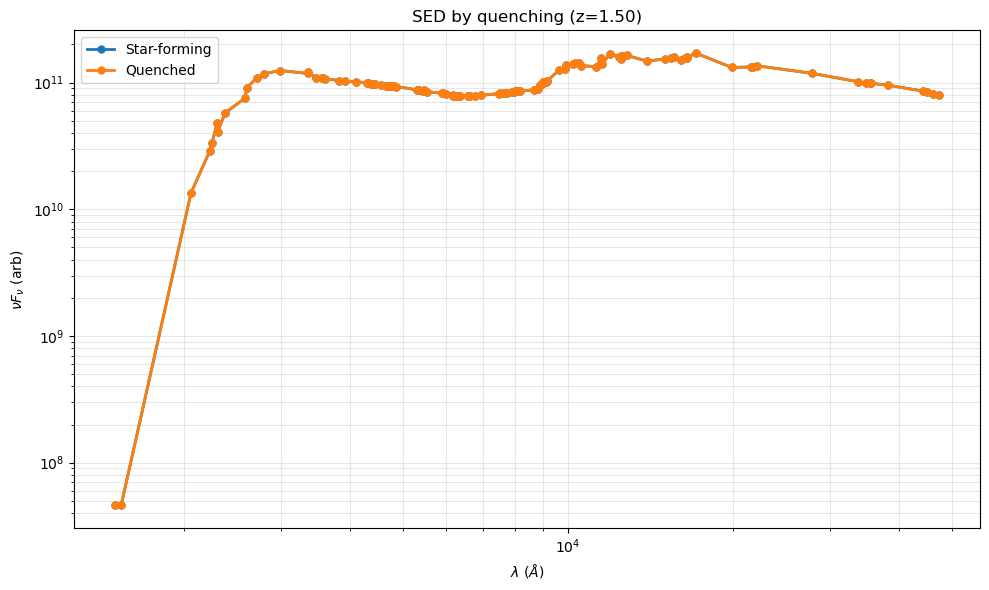

In [11]:
### SED comparison: Star-forming vs Quenched (single redshift)

# Select a redshift (e.g., z~0)
snap_target = 90
snaps = list_snapshots()

# Find the target snapshot
for snap, path in snaps:
    if snap == snap_target:
        z = get_redshift(caesar.load(str(path)))
        break

classification = classify_galaxies(path, sfr_threshold=0.01, ssfr_threshold=1e-11)
print(f"z={z:.2f}: {classification['star_forming'].sum()} star-forming, {classification['quenched'].sum()} quenched")

# sed for classifications
fig, ax = plt.subplots(figsize=(10, 6))
for label, mask in [("Star-forming", classification['star_forming']), ("Quenched", classification['quenched'])]:
    if mask.sum() == 0:
        print(f"No {label} galaxies found")
        continue
    
    lam_AA, nuFnu, _ = compute_summed_sed_from_appmags(path)
    ax.loglog(lam_AA, nuFnu, marker="o", linewidth=2, markersize=5, label=label)

ax.set_xlabel(r"$\lambda$ ($\AA$)")
ax.set_ylabel(r"$\nu F_\nu$ (arb)")
ax.set_title(f"SED by quenching (z={z:.2f})")
ax.legend()
ax.grid(True, alpha=0.3, which="both")

plt.tight_layout()
plt.show()

In [10]:
classification = classify_galaxies(path, sfr_threshold=0.01, ssfr_threshold=1e-11)
print(f"z={z:.2f}: {classification['star_forming'].sum()} star-forming, {classification['quenched'].sum()} quenched")

z=4.07: 257 star-forming, 0 quenched
